# Dataset

The following machine learning exercises are applied on [sklearn wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) that is taken from [UCI wine dataset](https://archive.ics.uci.edu/ml/datasets/wine). Before to go deep into the analysis it's useful for the reader to understand how wine dataset is composed, that is it might be helpful to give a look at its features, features distribution, cardinalities, kind of labels that are in the dataset and so on, since it's a crucial task in a data analysis. We can get a brief description of the dataset in the following table.

| Features | Min | Max | Mean | SD |
| :------: | :-: | :-: | :--: | :-:|
| Alcohol  | 11.0| 14.8| 13.0 | 0.8|
| Malic Acid | 0.74 | 5.80 | 2.34 | 1.12 |
| Ash | 1.36 | 3.23 | 2.36 | 0.27 |
| Alcalinity of Ash | 10.6 | 30.0 | 19.5 | 3.3 |
| Magnesium                   | 70.0 |162.0    |99.7  |14.3
| Total Phenols               |0.98  |3.88    |2.29  |0.63
| Flavanoids:                  | 0.34  |5.08   | 2.03  |1.00
| Nonflavanoid Phenols         |0.13  |0.66    |0.36  |0.12
| Proanthocyanins              |0.41  |3.58    |1.59  |0.57
| Colour Intensity              |1.3  |13.0     |5.1   |2.3
| Hue                          |0.48  |1.71    |0.96  |0.23
| OD280/OD315 of diluted wines |1.27  |4.00    |2.61  |0.71
| Proline                       |278 |  1680     |746   |315

- Missing Attribute Values: None
- Class Distribution: class_0 (59), class_1 (71), class_2 (48)

From this brief description we can see that the dataset is composed by 13 continuos features and there are 3 class lables that represent 3 different wine categories. For the following exercises we will use a 2D representation of the dataset, in particular we will use only the first two features (i.e Alchol and Malic Acid). It could be interesting to see the distribution of these features, among all classes and one per class.

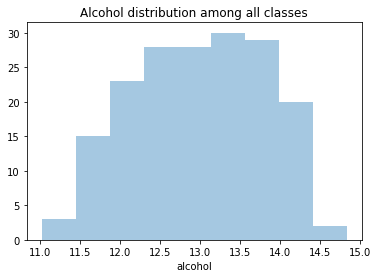

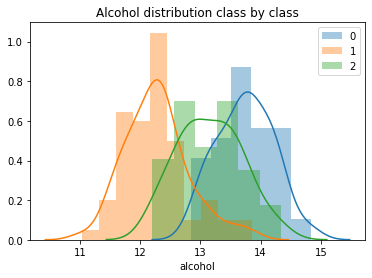

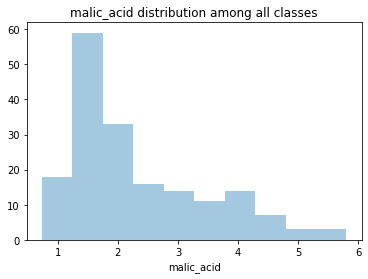

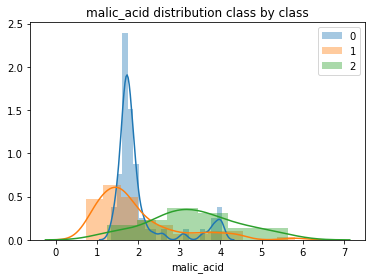

In [5]:
import sklearn as sk
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

raw_data = sk.datasets.load_wine()
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
sns.distplot(data['alcohol'],kde=0)
plt.title("Alcohol distribution among all classes")
plt.show()

for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i], 
                 kde=1,label='{}'.format(i))

plt.title("Alcohol distribution class by class")
plt.legend()
plt.show()

sns.distplot(data['malic_acid'],kde=0)
plt.title("malic_acid distribution among all classes")
plt.show()

for i in data.target.unique():
    sns.distplot(data['malic_acid'][data.target==i], 
                 kde=1,label='{}'.format(i))

plt.title("malic_acid distribution class by class")
plt.legend()
plt.show()

From these graphs we can see an interesting distribution of *alcohol* among each class, it seems that each wine category have different percentages of alcohol inside, like a low-mid-high distribution. The other feature, *malic_acid*, give us an interesting information too, indeed it seems that the first wine category has a specific value range for these feature, even the third category seems to have a quite well separated range of value for this feature. We have to keep in mind that all these values are not scaled, scaling them could lead to more precise informations on how these wine categories are separated in terms of these features.

# Sets preparation

Before to proceed with the requested analysis I have split the data into a train, validate and test subsets as suggested. The proportion used is 5:3:2, so the 50% of the data are used as training set, 30% are used for the validation set and the remaining are used to test classifiers. To do so I have used the `train_test_split` function of the `sklearn` package. Here it's the code from the code part of the homework:

In [ ]:
# create samples
train_size, validate_size, test_size = round(len(X) * 0.5), round(len(X) * 0.2), round(len(X) * 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=validate_size, random_state=1)

As the code states I've split the process into two steps, in the first step I've split data into train and test set and then I've split the train set again to get the final training set and a validation set. Using the number of samples instead of the percentage of samples in the `test_size` option of the function I've preserved the proportion between each subsets. **Not requested optimization was not taken** , that is I didn't 

- scale data
- use k-fold validation (when not requested)
- search for other two features to optimize a model

The seed used for random split is given by `random_state` variable that in the following analysis will be 1, so please use this value to get the same result of the report.

# K-Nearest Neighbors

KNN is a non parametric technique that attempts to estimate the conditional distribution of Y given X. Given a positive number K and a test observation $x_0$, the KNN classifier first identifies the K points that are closest, given a distance metric, to $x_0$ then it classifies this point taking a majority vote (in a classification setting). Let's say to take a value of K equals to 5 and 5 points that are labeled in this way: (A,A,A,B,B), so if these points are the 5 closest ones to $x_0$ then $x_0$ would be labeled with A.

## Classification

To do the KNN classification I've just created an array `kn_values=[1,3,5,7]` then I used a foreach loop to iterate through this array and at each step: 

- I've saved in a variable called `kn` the current value of `k`. 
- I've created and fitted a knn model using [KneighborsCLassifier function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba)
- I've plotted the model with [Matplot library](https://matplotlib.org/). By default this classifier uses the same wight for each attribute and a `minkowski` distance metric.
- I've took the prediction score evaluated with the validation test, and if it was the current best I've store it in a variable. Here it is the definition of [score](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/base.py#L332), this function returns the mean prediction accuracy of the model over a test set.
- At the end of the loop I was able to see how the best knn classifier stored in `best_clf` can perform over the test data.

|   K  | Accuracy on validation |
| :--: | :--------------------: |
|   1  |        0.694444        |
|   3  |        0.722222        |
|   5  |        0.805556        |
|   7  |        0.805556        |  





